<a href="https://colab.research.google.com/github/Jeevan-Neupane/PyTorch/blob/main/02_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

## What we are covering

In [ ]:
what_we_are_covering= {
    1:"Data (Prepare and load)",
    2:"build model",
    3:"fitting the model to data(training)",
    4:"making predictions  and evaluating a model(inference)",
    5:"saving and loading a model",
    6:"putting it all together"
}


In [ ]:
what_we_are_covering

{1: 'Data (Prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions  and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 01. Data (Preparing and Loading)

### To show the two steps of ML
### We are going to create some known data using the linear regression formula


In [ ]:
# Create *known* parameter
weight = 0.7
bias = 0.3

start =0
end=1
step =0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X+bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
len(X),len(y)

(50, 50)

### Split into train and test

In [ ]:
train_split  = int(0.8 *len(X));
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### Visualize our data

In [ ]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=  y_test, predictions=None):
  plt.figure(figsize=(10,7));
  #Plot the training data
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training Data");
  #Plot the test data
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data");

  #If predictions are provided
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions");

  plt.legend(prop={"size":14})


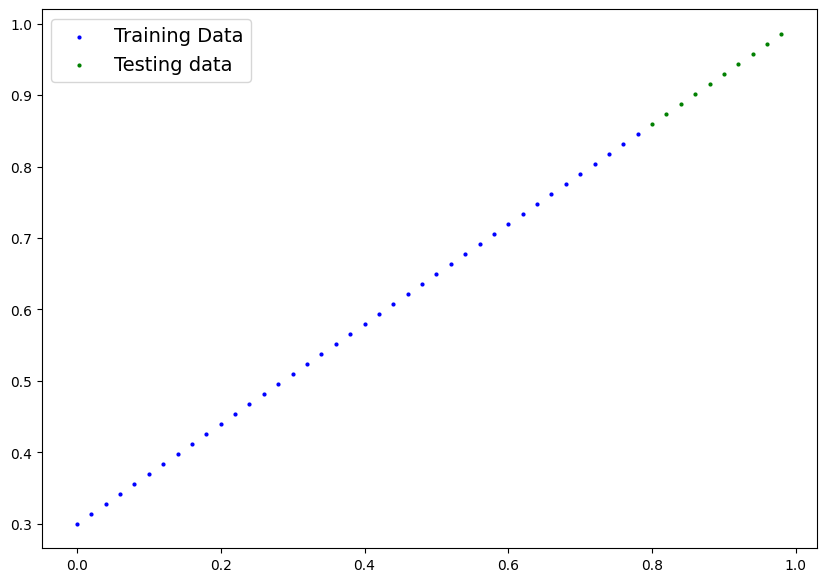

In [ ]:
plot_prediction()

## 02. Building a Model For Linear Regression

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


### Checking the contents of our pytorch model



In [ ]:
torch.manual_seed(42);

model_0 = LinearRegressionModel();
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#To get the state we cans use  .state_dict().
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference_mode()`

In [ ]:
# Making predictions with model
with torch.inference_mode():
  y_preds= model_0(X_test);

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

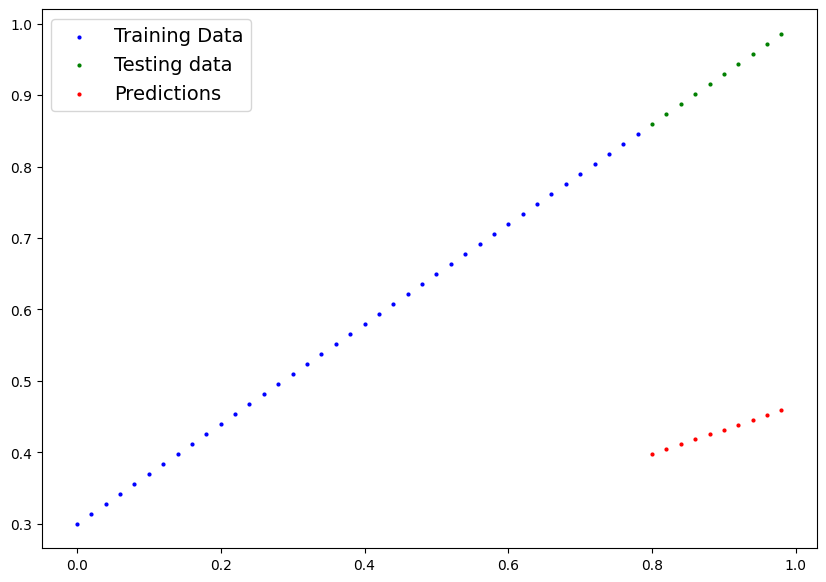

In [ ]:
plot_prediction(predictions=y_preds )

## 3.Train Model

Unknown Paramter -> Know Paramter

Things we need to train:

**Loss Functoin :** A function to measure how worng the predictions of model are
**Optimizer**: Takes into acocount the loss of a model an adjust the model's paramter

### Setup a loss function

In [ ]:
loss_fn= nn.L1Loss();


### Setup Optimizer

In [ ]:
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001) #(Stochastic gradient descent) #lr= learning rate



### Training and Testing Loop

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight,bias

(0.7, 0.3)

In [ ]:
 #Training Loop
torch.manual_seed(42)

epoch_count=[];
train_loss_values=[];
test_loss_values=[];

epochs = 1000

for epoch in range(epochs):

  #Set the model to training mode
  model_0.train();

  #1. Forward Pass
  y_pred= model_0(X_train);

  #2 . Calculate the loss
  loss = loss_fn(y_pred,y_train);
  # print(f"Loss at epoch {epoch} : {loss}");


  #3. Optimizer zero grad
  optimizer.zero_grad();

  #4. Perform backpropagation on the loss with respect tot he paramter of the model
  loss.backward();

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step();

  model_0.eval(); #turns of gradient tracking

  with torch.inference_mode():
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test);

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      epoch_count.append(epoch);
      train_loss_values.append(loss.detach().numpy());
      test_loss_values.append(test_loss.detach().numpy());



Epoch: 0 | Loss: 0.02435956709086895 | Test Loss: 0.05690721794962883
Epoch: 10 | Loss: 0.024016480892896652 | Test Loss: 0.05607985332608223
Epoch: 20 | Loss: 0.02367258258163929 | Test Loss: 0.055252473801374435
Epoch: 30 | Loss: 0.023329313844442368 | Test Loss: 0.054493773728609085
Epoch: 40 | Loss: 0.022986043244600296 | Test Loss: 0.05366641283035278
Epoch: 50 | Loss: 0.022642139345407486 | Test Loss: 0.05283904820680618
Epoch: 60 | Loss: 0.02229905314743519 | Test Loss: 0.05208033323287964
Epoch: 70 | Loss: 0.02195560745894909 | Test Loss: 0.05125296115875244
Epoch: 80 | Loss: 0.021611705422401428 | Test Loss: 0.05042559653520584
Epoch: 90 | Loss: 0.021268798038363457 | Test Loss: 0.0496668815612793
Epoch: 100 | Loss: 0.02092517353594303 | Test Loss: 0.0488395169377327
Epoch: 110 | Loss: 0.020581401884555817 | Test Loss: 0.04808080196380615
Epoch: 120 | Loss: 0.020238537341356277 | Test Loss: 0.047253452241420746
Epoch: 130 | Loss: 0.019894743338227272 | Test Loss: 0.04642607644

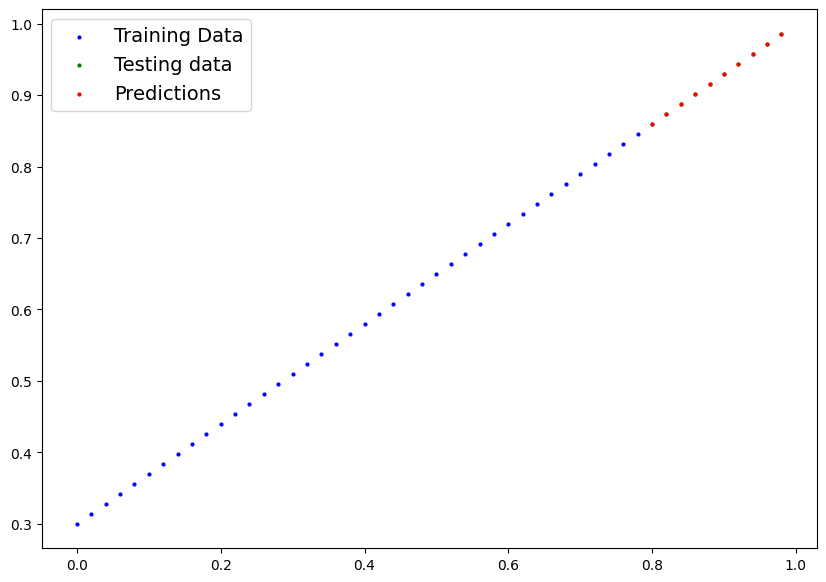

In [ ]:
with torch.inference_mode():
  y_preds= model_0(X_test);


plot_prediction(predictions=y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

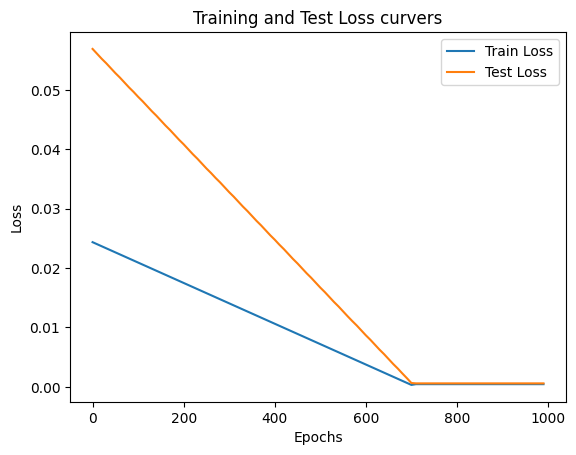

In [ ]:
plt.plot(epoch_count,train_loss_values,label="Train Loss");
plt.plot(epoch_count, test_loss_values,label="Test Loss");
plt.title("Training and Test Loss curvers");
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


## Saving and Loading a Model in Pytorch

### Saving It

In [ ]:
from pathlib import Path

#Create Models Directory

MODEL_PATH = Path("models");

MODEL_PATH.mkdir(parents=True,exist_ok=True)

# 2. Create model save path

MODEL_NAME = "02_Pytorch_Workflow_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save the model state dict

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

### Loading It

In [ ]:
# To ladin in a saved state_dict we have to instantitate  a new instance of our model class

loaded_model_0 = LinearRegressionModel();

# Load the saved state_dict of model_0 (this will update the new instance with updated parameter);

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH));

<ipython-input-33-0166859ab349>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH));


In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

### Making some predictions with our loadedmodel

In [ ]:
loaded_model_0.eval();

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])